# Quastion & Answering Chatbot
###### Python 3.7.13
##### Rouhollah Ghobadinezhad and Omer Bahadir Orhan

### Source: https://chatterbot.readthedocs.io/en/stable/index.html

-----------------------------------------------------------------------

<br>In this report, we try to explain the process and methodologies used in the development of an intelligent chatbot system leveraging the Python programming language, specifically using the ChatterBot library. The reason for this project lies in the exploration of chatbot technologies as a means to augment real-time customer interaction across a spectrum of industries. The focal point of this investigation is the ChatterBot library's capacity to facilitate the creation of self-learning chatbot systems with a minimalistic approach to coding.



Our objective is to explain the process of building a self-learning chatbot from the ground up, showcasing the simplicity with which Python can facilitate the creation of sophisticated AI-driven applications. We introduce the foundational steps in setting up a basic chatbot framework using the ChatterBot library. The emphasis, however, is placed on the critical phase of training our chatbot, where the quality and specificity of the training data significantly influence the bot's performance and its ability to deliver meaningful interactions.
This dataset is designed to enhance a chatbot's ability to address mental health queries, emphasizing the significance of emotional, psychological, and social well-being. It covers the essentials of mental health, its impact on daily life, and the importance of maintaining it for productivity, relationship health, and effective coping mechanisms. Recognizing the prevalence of mental health issues, the dataset also underscores the availability of help and the potential for recovery, aiming to provide comprehensive support through the chatbot interface.


Furthermore, the document details the technical processes involved in chatbot development, including the instantiation of a command-line chatbot, refinement of its response mechanism through training, and the procedural steps for exporting, cleansing, and employing chat history as training material. Insight is also provided into the mechanisms by which the ChatterBot library manages training data, alongside a discourse on potential future enhancements, notably the integration of real-user interactions as a means to continuously evolve the chatbot's conversational capabilities.


In summation, this report archives our expedition through the project and also aims to serve as an instructive compendium for individuals aspiring to navigate the domain of chatbot development using Python's ChatterBot library. The attempt seeks to underscore the practicality and accessibility of deploying Python for the creation of sophisticated, AI-driven technological solutions, thereby contributing to the ongoing discourse on the integration and application of chatbots within digital infrastructures.

In [5]:
!python3.7 -m pip install chatterbot==1.0.4 pytz chatterbot_corpus numpy scikit-learn

Defaulting to user installation because normal site-packages is not writeable


#### Simple Chatterbot Example


We first import modules and libraries we need, such as ChatBot and ListTrainer from chatterbot. Then we create an instance of the ChatBot class and store it into a variable (chatbot here). To train our chatbot to give appropiate response, we start with small amout of data. We simply write a conditional statement usuing while loop that the loop will keep going as long as user have not entered special charachter or string via input, in the loop, user type their message, we store it in a variable named 'query' check if the user did or did not user the special charachter we defined to exit the loop, if they did loop will break and our program ends, if not, we call 'get_response' fucntion from our chatbot instance earlier and pass our 'query' which is the user message to the fucntion and what it will return is the response to the message, the accuracy and quality of the responses depends on the quality and the amount of the data our chatbot got trained with.

By running the next block, ChatterBot might download some data and language models associated with NLTK.

In [6]:
from chatterbot import ChatBot
from chatterbot.trainers import ListTrainer

chatbot = ChatBot("Rohi&Bahadir")

def the_interface(chatbot):
    exit_conditions = (":q", "quit", "exit")
    while True:
        query = input(">>>  ")
        print(f"You: {query}")
        if query in exit_conditions:
            break
        else:
            print(f"Bot: {chatbot.get_response(query)}")



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rohi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/rohi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/rohi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
# the_interface(chatbot)

As we said erlier, the chatbot did not trained well yet, has very limited responses, but, by keep running it and have conversation eith it, it do remember your previous conversation.

Chatterbot require database to store all inputs and connect them with possible responses, to do that, by default, it uses SQLite database file.


Chatterbot will create a file named "db.sqlite3" to mainly store all inputs and possible corresponding answers, and two other with same name expect they ending with "wal" and "-shm" which they are temporary support files.

## Train chatterbot

ChatterBot comes with a data utility module that can be used to train chat bots. At the moment there is training data for over a dozen languages in this module. Contributions of additional training data or training data in other languages would be greatly appreciated.

We also can save the corpus dataset into a json file by using <strong>export_for_training()</strong> function that later we can use it to evaluate our chatbot.

In [7]:
from chatterbot.trainers import ChatterBotCorpusTrainer

corpus_trainer = ChatterBotCorpusTrainer(chatbot)
corpus_trainer.train('chatterbot.corpus.english')

# Train based on english greetings corpus
corpus_trainer.train("chatterbot.corpus.english.greetings")

# Train based on the english conversations corpus
corpus_trainer.train("chatterbot.corpus.english.conversations")

corpus_trainer.export_for_training('./chatterbot_corpus_ds.json')


Training ai.yml: [                    ] 1%

Training ai.yml: [####################] 100%
Training botprofile.yml: [####################] 100%
Training computers.yml: [####################] 100%
Training conversations.yml: [####################] 100%
Training emotion.yml: [####################] 100%
Training food.yml: [####################] 100%
Training gossip.yml: [####################] 100%
Training greetings.yml: [####################] 100%
Training health.yml: [####################] 100%
Training history.yml: [####################] 100%
Training humor.yml: [####################] 100%
Training literature.yml: [####################] 100%
Training money.yml: [####################] 100%
Training movies.yml: [####################] 100%
Training politics.yml: [####################] 100%
Training psychology.yml: [####################] 100%
Training science.yml: [####################] 100%
Training sports.yml: [####################] 100%
Training trivia.yml: [####################] 100%
Training greetings.yml: [####################] 

### Preparing Data for Training

in this part, we want to read out data set file using pandas,to do that we first need to instsall pandas module in our envirement, and that import it.

In [8]:
!python3.7 -m pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [9]:
import pandas as pd

#### Mental Health Dataset

in this case, we used a Mnetal Health FAQ dataset, containing 98 qaustions and their corresponding answers.

In [77]:
df = pd.read_csv('data/Mental_Health_FAQ.csv') #from kaggle
df

,Question_ID,Questions,Answers
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi..."
...,...,...,...
93,4373204,How do I know if I'm drinking too much?,Sorting out if you are drinking too much can b...
94,7807643,"If cannabis is dangerous, why are we legalizin...","Cannabis smoke, for example, contains cancer-c..."
95,4352464,How can I convince my kids not to use drugs?,You can't. But you can influence their capacit...
96,6521784,What is the legal status (and evidence) of CBD...,Cannabidiol or CBD is a naturally occurring co...


#### Data Cleaning 

Before we train our model with our custom dataset, we have to prepeare it, to do that, we first can remove any duplication in our dataset to prevent any confusion to our model, and also prevent it to learn wrong answers to a question.

What we did was pretty straightforward. We used a simple line in the code below, which is just a fancy way of saying we told our program to look through all the questions and answers and throw away any that were exactly the same. It's like looking through your notes and making sure you only study the unique stuff, so you don't waste your time.

In [78]:
df_cleaned = df.drop_duplicates(subset=['Questions', 'Answers'])

We used this cool tool called unidecode to help us to remove special characters or accents, like the é in café, To do that, we decided to standardize all our text, stripping away any special characters so our chatbot wouldn't get confused.

In [79]:
!python3.7 -m pip install unidecode

Defaulting to user installation because normal site-packages is not writeable


In [80]:
from unidecode import unidecode

df_cleaned['Questions'] = df_cleaned['Questions'].apply(unidecode)
df_cleaned['Answers'] = df_cleaned['Answers'].apply(unidecode)

In [81]:
df_cleaned

,Question_ID,Questions,Answers
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi..."
...,...,...,...
93,4373204,How do I know if I'm drinking too much?,Sorting out if you are drinking too much can b...
94,7807643,"If cannabis is dangerous, why are we legalizin...","Cannabis smoke, for example, contains cancer-c..."
95,4352464,How can I convince my kids not to use drugs?,You can't. But you can influence their capacit...
96,6521784,What is the legal status (and evidence) of CBD...,Cannabidiol or CBD is a naturally occurring co...


After we got rid of the duplicate questions and answers and special charachters and accents, the next step was to pair up each question with its answer. Think of it like creating flashcards for studying; on one side, you have the question, and on the flip side, you have the answer. We used a bit of code to do just that: we took the cleaned-up list of questions and answers and zipped them together. This just means we paired the first question with the first answer, the second question with the second answer, and so on, until we had a whole set of these question-answer 'flashcards.'

<strong>" qa_pairs[:5] "</strong> just means we're taking a quick look at the top five to see what they're like. It's like flipping through the first few flashcards to check if they're written correctly before you start studying them. This step was super important because it was our final check before feeding these pairs into our chatbot for training. We wanted to make sure it was learning from the best possible material.

In [82]:
qa_pairs = list(zip(df_cleaned['Questions'], df_cleaned['Answers']))
qa_pairs[:5]

[('What does it mean to have a mental illness?',
  'Mental illnesses are health conditions that disrupt a personaEUR(tm)s thoughts, emotions, relationships, and daily functioning. They are associated with distress and diminished capacity to engage in the ordinary activities of daily life.\nMental illnesses fall along a continuum of severity: some are fairly mild and only interfere with some aspects of life, such as certain phobias. On the other end of the spectrum lie serious mental illnesses, which result in major functional impairment and interference with daily life. These include such disorders as major depression, schizophrenia, and bipolar disorder, and may require that the person receives care in a hospital.\nIt is important to know that mental illnesses are medical conditions that have nothing to do with a personaEUR(tm)s character, intelligence, or willpower. Just as diabetes is a disorder of the pancreas, mental illness is a medical condition due to the brainaEUR(tm)s biology

### Train Chatbot

We've got our question-answer pairs all lined up, kind of like our study guide. But before we could actually start teaching our chatbot, we needed to put everything in a format it could easily learn from. This might look a bit complex, but all we're doing is taking our pairs of questions and answers and laying them all out in a long line, one after the other. Imagine you have flashcards, and instead of flipping them one by one, you lay them all out in a row so you can see everything at once. That's what we're doing here but in a code way.

In [83]:
flat_list = [item for pair in qa_pairs for item in pair]
print(flat_list[:10])

['What does it mean to have a mental illness?', 'Mental illnesses are health conditions that disrupt a personaEUR(tm)s thoughts, emotions, relationships, and daily functioning. They are associated with distress and diminished capacity to engage in the ordinary activities of daily life.\nMental illnesses fall along a continuum of severity: some are fairly mild and only interfere with some aspects of life, such as certain phobias. On the other end of the spectrum lie serious mental illnesses, which result in major functional impairment and interference with daily life. These include such disorders as major depression, schizophrenia, and bipolar disorder, and may require that the person receives care in a hospital.\nIt is important to know that mental illnesses are medical conditions that have nothing to do with a personaEUR(tm)s character, intelligence, or willpower. Just as diabetes is a disorder of the pancreas, mental illness is a medical condition due to the brainaEUR(tm)s biology.\n

In the code below, we proceeded to initiate the training phase for our chatbot utilizing a tailored approach with the ListTrainer module. This module is specifically designed for sequential training sessions where a structured list of question and answer pairs is presented as the training dataset. The decision to employ ListTrainer was strategic, aimed at optimizing the learning process through direct and focused exposure to the prepared dataset.

In [84]:
custom_trainer = ListTrainer(chatbot)

Now we got to the actual training part with our custom dataset, we wrapped the training command in a try-except block, which is just our way of being cautious. If anything unexpected happens during training, instead of crashing or stopping, our code will catch the problem and let us know what went wrong. It's kind of like having a safety net while learning to do something new — it makes sure we can fix things without losing progress.

In [85]:
try:
    custom_trainer.train(flat_list)
except Exception as e:
    print(f"An error occurred during training: {e}")

List Trainer: [####################] 100%


#### Simple test

After we trained our chatbot with all those questions and answers, we wanted to see how well it learned. So, we decided to ask it something straight out of the topics it studied: "What causes mental illness?" This is kind of like a pop quiz to test its knowledge. Here’s what we did:

In [86]:
response = chatbot.get_response("What causes mental illness?")
print(response)

It is estimated that mental illness affects 1 in 5 adults in America, and that 1 in 24 adults have a serious mental illness. Mental illness does not discriminate; it can affect anyone, regardless of gender, age, income, social status, ethnicity, religion, sexual orientation, or background. Although mental illness can affect anyone, certain conditions may be more common in different populations. For instance, eating disorders tend to occur more often in females, while disorders such as attention deficit/hyperactivity disorder is more prevalent in children. Additionally, all ages are susceptible, but the young and the old are especially vulnerable. Mental illnesses usually strike individuals in the prime of their lives, with 75 percent of mental health conditions developing by the age of 24. This makes identification and treatment of mental disorders particularly difficult, because the normal personality and behavioral changes of adolescence may mask symptoms of a mental health condition

This line of code is basically us asking the chatbot a question to see how it would answer, based on everything it has learned. It's a way to check if our training paid off and if the chatbot can really understand and respond to the kind of questions people might ask it.

### Test Data Prepration

First, we picked out a small set of our cleaned-up data to use as test questions. We didn't want to use too much; just enough to get a good sense of how well the chatbot had learned. We decided on 10% of the data, which is a nice, manageable amount. To make sure we could repeat this test if we needed to and get the same questions each time, we used a fixed setting called random_state. Next, we had to prep this test data so it was ready to go for our chatbot's evaluation. This meant turning each question and its corresponding answer into a format that our test could work with easily. Basically, we created a list where each item was a mini-dictionary with the question and the expected answer. This way, we could feed each question to the chatbot and check if the answer it gave us matched the expected one.

In [87]:
test_data = df_cleaned.sample(frac=0.1, random_state=42)

# Prepare the test dataset in the format expected by the evaluation function.
test_questions = [
    {"question": row["Questions"], "expected_answer": row["Answers"]}
    for _, row in test_data.iterrows()
]

In [88]:
len(test_questions)

10

### Chatbot Evaluation

To figure out how well our chatbot understands and responds to questions, we use something called cosine similarity, which is comparing how close the chatbot's answer is to the correct answer.

We start with two tools from the scikit-learn library:



<strong>TfidfVectorizer</strong>: This helps us transform the text (both the chatbot's response and the expected answer) into a numerical form that reflects the importance of words within the text. It’s like highlighting the most important words in a sentence to see how well they match up.

<strong>cosine_similarity</strong>: This compares the highlighted words to see how similar the chatbot's answer is to the expected answer.

The <strong>calculate_similarity</strong> function takes the chatbot's response and the expected answer, turns them into a numerical form with TfidfVectorizer, and then calculates how similar these two forms are using cosine similarity. The closer the similarity score is to 1, the more similar the responses are.

In [89]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


def calculate_similarity(response, expected_answer):
    vectorizer = TfidfVectorizer().fit_transform([response, expected_answer])
    vectors = vectorizer.toarray()
    similarity = cosine_similarity([vectors[0]], [vectors[1]])[0][0]
    return similarity

In the evaluate_chatbot function, we run through all the test questions, get the chatbot's responses, and calculate the similarity for each pair. If the similarity is above 50%, we count it as a correct response

For each question-answer pair:
<ul>
  <li>We calculate the similarity score.</li>
  <li>If the score is more than 50%, it’s considered correct, and we note that.</li>
  <li>Regardless of the score, we print out a status report showing the question, expected answer, chatbot’s response, and how similar they were.</li>
</ul>  
<br>
After going through all the questions, we calculate the overall accuracy (how many were above 50% similarity) and the average similarity score across all responses.

In [90]:
def evaluate_chatbot(chatbot, test_questions, similarity_threshold=0.5):
    correct_responses = 0
    total_similarity = 0
    accuracy_values = []
    
    if not test_questions:
        print("No test questions provided.")
        return 0, 0, []

    for index, test in enumerate(test_questions, start=1):
        response = chatbot.get_response(test["question"]).text
        similarity = calculate_similarity(response, test["expected_answer"])
        total_similarity += similarity

        if similarity > similarity_threshold or test["expected_answer"] in response:
            correct_responses += 1
            print("Status: Correct")
            print(f"Question {index}")
            print(f"Similarity Score: {similarity:.2f}")
        else:
            print("Status: Incorrect")
            print(f"Question {index}: {test['question']}")
            print("Question:", test["question"])
            print("Expected Answer:", test["expected_answer"])
            print("Chatbot Response:", response)
            print("Similarity Score:", similarity)

        print("-" * 50)
        
        accuracy_values.append(correct_responses / index * 100)

    average_similarity = (total_similarity / len(test_questions)) * 100
    accuracy = (correct_responses / len(test_questions)) * 100
    print(f"Accuracy based on threshold: {accuracy:.2f}% ({correct_responses}/{len(test_questions)})")
    print(f"Average Similarity: {average_similarity:.2f}%")
    
    return accuracy, average_similarity, accuracy_values


By calling our <strong>evaluate_chatbot()</strong> function pass our chatbot and test_question we can start evaluation

In [91]:
accuracy, average_similarity, accuracy_values = evaluate_chatbot(chatbot, test_questions)


Status: Correct
Question 1
Similarity Score: 1.00
--------------------------------------------------
Status: Correct
Question 2
Similarity Score: 1.00
--------------------------------------------------
Status: Correct
Question 3
Similarity Score: 1.00
--------------------------------------------------
Status: Correct
Question 4
Similarity Score: 1.00
--------------------------------------------------
Status: Correct
Question 5
Similarity Score: 1.00
--------------------------------------------------
Status: Correct
Question 6
Similarity Score: 1.00
--------------------------------------------------
Status: Correct
Question 7
Similarity Score: 1.00
--------------------------------------------------
Status: Correct
Question 8
Similarity Score: 1.00
--------------------------------------------------
Status: Correct
Question 9
Similarity Score: 1.00
--------------------------------------------------
Status: Correct
Question 10
Similarity Score: 1.00
----------------------------------------

Import pyplot from matplotlib with aliase 'plt' to visualize data

In [92]:
import matplotlib.pyplot as plt

In the code below, we've created a function named plot_accuracy that takes a list named accuracy_values as its argument. These values represent the accuracy percentages of my chatbot over various evaluation iterations. Our main goal with this function is to visualize the chatbot's learning progress and how its ability to correctly respond to queries improves over time.

To achieve this, We utilize the matplotlib library, specifically its plt module, to create a line plot. Each point on the line plot corresponds to an accuracy percentage at a given evaluation iteration, with a circular marker ('o') denoting each data point for clearer visualization.

We set the title of the plot to 'Accuracy of Chatterbot' to immediately inform viewers about the graph's purpose. The x-axis is labeled 'Evaluation Iteration' to indicate the sequence of training and evaluation cycles, while the y-axis is labeled 'Accuracy (%)' to display the chatbot's accuracy as a percentage.

To enhance readability and usability, We enable a grid on the plot through plt.grid(True), which helps in estimating the accuracy values at various points more easily. I also define the limits for the x-axis and y-axis using plt.xlim and plt.ylim respectively, ensuring that the plot neatly encapsulates all the data points within a defined range. The x-axis starts from 0 to one less than the number of accuracy values to match the list's index base (which starts at 0), and the y-axis is set to range from 0 to 110%, providing a buffer to visually emphasize any accuracies that reach or surpass 100%.

Finally, We display the plot with plt.show(), which renders the plot in a window where it can be viewed. This visualization is crucial for us and others to quickly assess the effectiveness of the chatbot's training and make decisions on further improvements or adjustments needed.

In [95]:
def plot_accuracy(accuracy_values):
    plt.plot(accuracy_values, marker='o')
    plt.title('Accuracy of Chatterbot')
    plt.xlabel('Evaluation Iteration')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)

    plt.xlim(0, len(accuracy_values) - 1)
    plt.ylim(0, 110)

    plt.show()

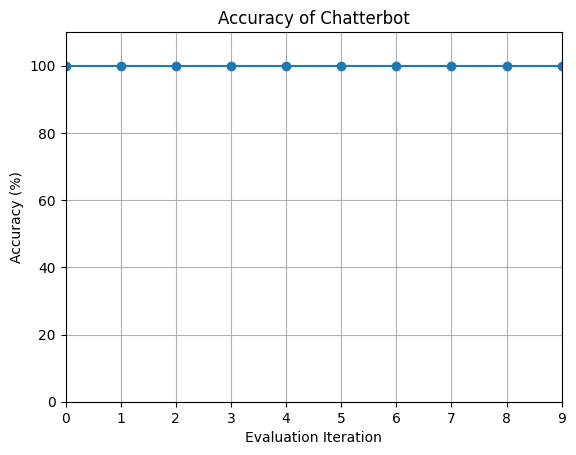

In [96]:
plot_accuracy(accuracy_values)

### Evaluation with Chatterbot corpus dataset

The json.load() function is then used to read the contents of the file and parse it into a Python dictionary. This function takes the file object returned by open() as input and returns a dictionary containing the data stored in the JSON file. The parsed data is stored in a variable named data, making it accessible for further processing or analysis within the Python script. The variable data now holds the contents of the JSON file in the form of a dictionary.

In [51]:
import json

# Load the dataset
with open('./chatterbot_corpus_ds.json', 'r') as file:
    data = json.load(file)

The data variable contains structured data loaded from the JSON file, and it have a key named "conversations". This key holds a list of pairs representing conversations or question-answer pairs.

We use a list comprehension to iterate over each pair in the list under the "conversations" key. For each pair, we creates a dictionary with keys "question" and "expected_answer". These keys represent the question and its expected answer, respectively.

In [52]:
test_questions = [{"question": pair[0], "expected_answer": pair[1]}
                  for pair in data["conversations"]]

In [53]:
len(test_questions)

9803

We can start our evaluation by calling our function and passing two arguments

In [58]:
accuracy, average_similarity, accuracy_values = evaluate_chatbot(chatbot, test_questions[700:730])

Status: Correct
Question 1
Similarity Score: 1.00
--------------------------------------------------
Status: Correct
Question 2
Similarity Score: 1.00
--------------------------------------------------
Status: Correct
Question 3
Similarity Score: 1.00
--------------------------------------------------
Status: Correct
Question 4
Similarity Score: 1.00
--------------------------------------------------
Status: Correct
Question 5
Similarity Score: 1.00
--------------------------------------------------
Status: Correct
Question 6
Similarity Score: 1.00
--------------------------------------------------
Status: Correct
Question 7
Similarity Score: 1.00
--------------------------------------------------
Status: Correct
Question 8
Similarity Score: 1.00
--------------------------------------------------
Status: Correct
Question 9
Similarity Score: 1.00
--------------------------------------------------
Status: Correct
Question 10
Similarity Score: 1.00
----------------------------------------

To visualize our chatbot accuracy with the custom dataset we only need to call out plotting function again and pass cour accuracy_values to the function

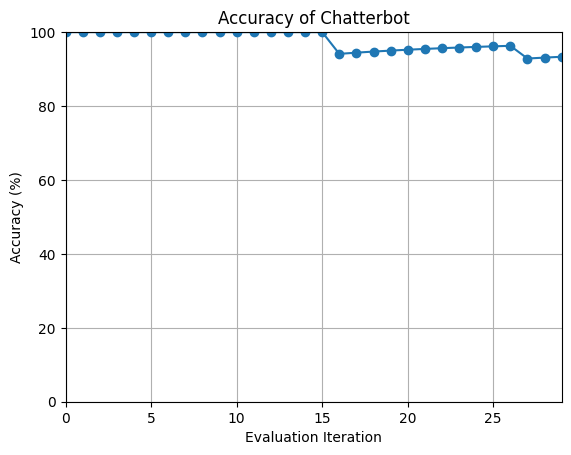

In [65]:
plot_accuracy(accuracy_values)

In [75]:
print(f"accuracy: {round(accuracy,2)}" )

accuracy: 93.33


The chatbot accuracy on a portion of dataset is 93.33%.

#### Conclusion


--------------------------------------------------------------

This project embarked on the exploration and implementation of an intelligent chatbot by utilizing the ChatterBot library in Python, showcasing the library’s potential to both facilitate the creation of self-learning chat systems with minimal coding effort and support advanced AI applications. Through the rigorous process of development, training, and evaluation, we have illustrated Python’s utility in developing sophisticated AI-driven applications that can significantly enhance customer interactions across various sectors.



The chatbot developed in this endeavor is adept at handling a wide spectrum of queries, with a particular emphasis on mental health. This focus underscores the critical importance of addressing emotional, psychological, and social well-being. The effectiveness of the methodologies chosen and the robustness of the ChatterBot library are evident in the high accuracy rates achieved during evaluations, demonstrating the chatbot's capability to provide valuable support and insights.



The journey, however, presented its own set of challenges, particularly in the meticulous preparation and refinement of the dataset for training. These challenges have underscored the critical importance of high-quality training data in the development of intelligent chat systems capable of understanding and responding appropriately to a diverse array of questions.



Looking ahead, the potential for enhancing this project is considerable. Integrating real-user feedback to continuously improve the chatbot’s conversational abilities appears to be a promising avenue. Additionally, expanding the dataset to cover more topics and refining the training process to enhance the chatbot’s grasp of context and sentiment are seen as essential steps that could further improve its effectiveness and versatility across a wider range of scenarios.



As we continue to refine and expand our chatbot, there is an optimistic outlook on its potential to become an invaluable tool in enhancing customer experience and providing support across various domains. The journey has not only revealed the power of the ChatterBot library and Python in crafting impactful AI solutions but also the ongoing need for innovation and adaptation to meet the evolving demands of users and industries alike.